In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

# Manage string to time object conversion
def str_to_datetime(date_str, time_str):
    str_total = str(date_str) + ' ' + str(time_str)
    return datetime.datetime.strptime(str_total, '%d/%m/%y %H:%M')

# Manage duration as date
def str_to_time(time_str):
    return datetime.datetime.strptime(time_str, '%H:%M')

# Duration in hours
def deltatime_to_hours(t1, t2):
    dt = t2 - t1
    return dt.total_seconds()/3600.

In [139]:
infile = open('data_raw.csv', 'r', encoding='utf8')
outfile = open('formated_data.csv', 'w', encoding='utf8')
for line in infile:
    outfile.write(line.replace(',', '.').replace(',', '.'))
infile.close()
outfile.close()

In [214]:
cols_names = ['date', 't_i', 't_f', 'dt', 
              'address_i', 'address_f', 'd', 'km', 
              'conso', 'gazoil_price', 'price' , 
              'cat', 'unknown']
df = pd.read_csv('formated_data.csv', delimiter=';', names=cols_names, skiprows=1)

# Convert date time into a proper object
df['t_i'] = df[['date', 't_i']].apply(lambda c: str_to_datetime(*c), axis=1)
df['t_f'] = df[['date', 't_f']].apply(lambda c: str_to_datetime(*c), axis=1)

# Convert duration into a date time (note deltatime) for plotting purpose
df['dt'] = df['dt'].apply(str_to_time)
df['dt_hours'] = df[['t_i', 't_f']].apply(lambda c: deltatime_to_hours(*c), axis=1)


# Get 7 days average
dftest = df.set_index(df['t_i'])
df_conso_weekly = dftest[['t_i', 'd', 'conso']].resample('W').mean()

# Get mean consomation (Nliters/Nkm = sum(conso*d/100) / sum(d))
conso_mean = np.sum(df['conso']*df['d']/100) / np.sum(df['d'])*100

#df.head()
df_conso_weekly.head()

,d,conso
t_i,,
2019-11-17,6.933333,6.577778
2019-11-24,10.996154,5.907692
2019-12-01,9.388000,5.688000


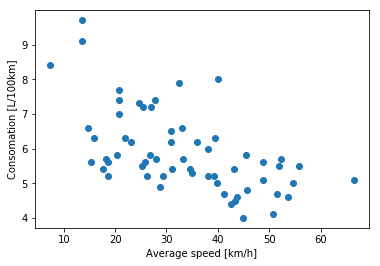

In [215]:
plt.plot(df['d']/df['dt_hours'], df['conso'], marker='o', linewidth=0)
plt.xlabel('Average speed [km/h]')
plt.ylabel('Consomation [L/100km]');

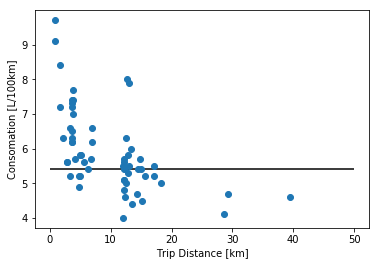

In [216]:
plt.plot(df['d'], df['conso'], marker='o', linewidth=0);
plt.xlabel('Trip Distance [km]')
plt.hlines(y=conso_mean, xmin=0, xmax=50)
plt.ylabel('Consomation [L/100km]');

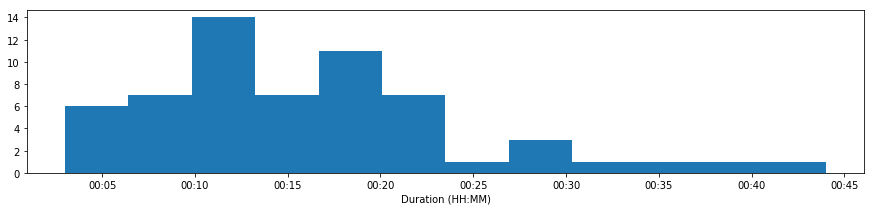

In [217]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.hist(df['dt'], bins=12)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
plt.xlabel('Duration (HH:MM)');

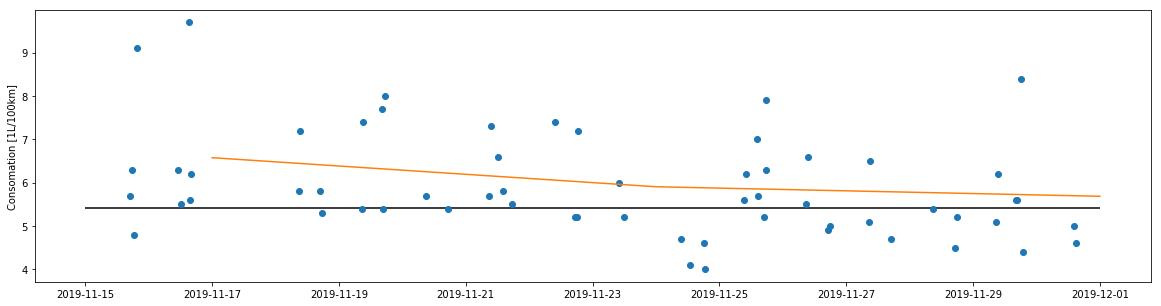

In [219]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot_date(df['t_i'], df['conso'], marker='o', linewidth=0)
plt.hlines(y=conso_mean, xmin=datetime.datetime(2019, 11, 15), xmax=datetime.datetime(2019, 12, 1))
plt.plot(df_conso_weekly['conso'])
plt.ylabel('Consomation [1L/100km]');

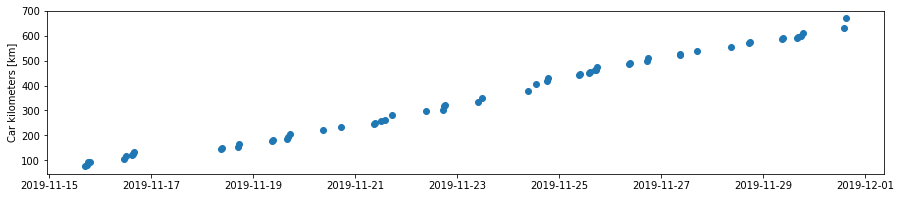

In [162]:
fig, ax = plt.subplots(figsize=(15, 3))
plt.plot_date(df['t_i'], df['km'], marker='o', linewidth=0)
plt.ylabel('Car kilometers [km]');

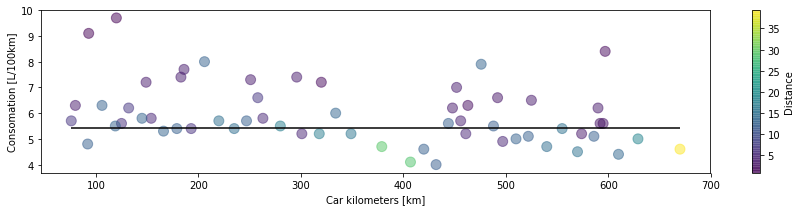

In [195]:
fig, ax = plt.subplots(figsize=(15, 3))
plt.scatter(df['km'], df['conso'], c=df['d'], s=100, alpha=0.5)
plt.hlines(y=conso_mean, xmin=np.min(df['km']), xmax=np.max(df['km']))
plt.xlabel('Car kilometers [km]')
plt.ylabel('Consomation [L/100km]')
plt.colorbar(label='Distance');

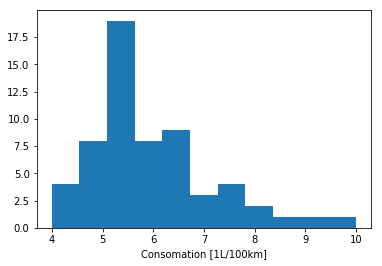

In [145]:
plt.hist(df['conso'], bins=np.linspace(4, 10, 12))
plt.xlabel('Consomation [1L/100km]');

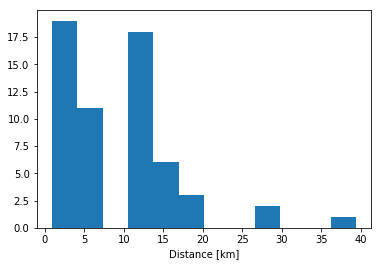

In [147]:
plt.hist(df['d'], bins=12)
plt.xlabel('Distance [km]');